Lazy examples of a Gaussian random field, based-on [this post](https://structures.uni-heidelberg.de/blog/posts/gaussian-random-fields/index.php).

$$C(\Delta x) = \cos(\frac{2 \pi \Delta x}{\ell})$$

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import geospatial_utils as gu

nx, ny = 50, 50

grf1 = gu.gaussian_random_field(nx, ny, l=5)
grf2 = gu.gaussian_random_field(nx, ny, l=10)
grf3 = gu.gaussian_random_field(nx, ny, l=25)

/Users/alison/Documents/DPhil/geospatial_utils/geospatial_utils/fields.py:32: RuntimeWarning: covariance is not positive-semidefinite.
  grf = np.random.multivariate_normal(mean, var * cmat)


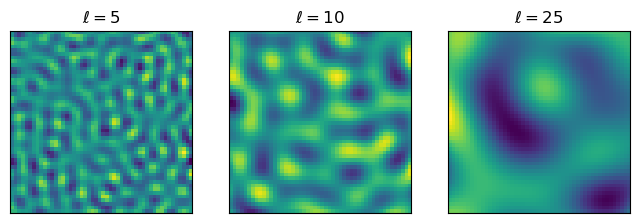

In [2]:
cmap = 'viridis'
fig, axs = plt.subplots(1, 3, figsize=(8, 3))
axs[0].imshow(grf1, cmap=cmap)
axs[0].set_title(r'$\ell=5$')
axs[1].imshow(grf2, cmap=cmap)
axs[1].set_title(r'$\ell=10$')
axs[2].imshow(grf3, cmap=cmap);
axs[2].set_title(r'$\ell=25$')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
fig.savefig(os.path.join("..", "figures", "grf_3lengths.png"), dpi=300, bbox_inches='tight')

## Exponential covariance 

$$C(\Delta x) = \sigma \exp\left(\frac{\Delta x}{\ell}\right)$$
[Notes here](https://pieterjanrobbe.github.io/GaussianRandomFields.jl/dev/tutorial/)

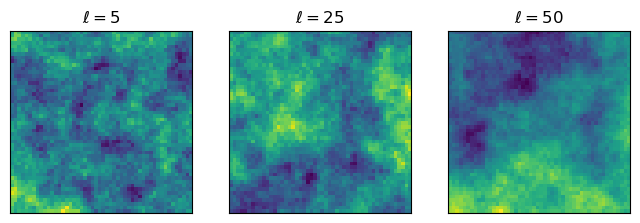

In [3]:
grf1 = gu.gaussian_random_field(nx, ny, l=5, cov=gu.exp1d_cov)
grf2 = gu.gaussian_random_field(nx, ny, l=25, cov=gu.exp1d_cov)
grf3 = gu.gaussian_random_field(nx, ny, l=50, cov=gu.exp1d_cov)


cmap = 'viridis'
fig, axs = plt.subplots(1, 3, figsize=(8, 3))
axs[0].imshow(grf1, cmap=cmap)
axs[0].set_title(r'$\ell=5$')
axs[1].imshow(grf2, cmap=cmap)
axs[1].set_title(r'$\ell=25$')
axs[2].imshow(grf3, cmap=cmap);
axs[2].set_title(r'$\ell=50$')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
fig.savefig(os.path.join("..", "figures", "grf_3lengths.png"), dpi=300, bbox_inches='tight')

## Matérn covariance

$$ C(\Delta x) = \frac{1}{\Gamma(\nu) 2^{\nu-1}} \left( \sqrt{2\nu}\frac{\Delta x}{\ell}\right) K_\nu \left( \sqrt{2\nu}\frac{\Delta x}{\ell}\right)$$

[Notes here](https://www.uah.edu/images/colleges/science/math/cbms2020/lecture_1_slides.pdf)

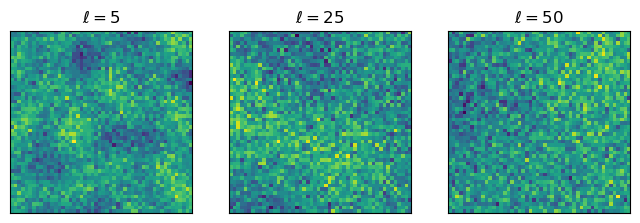

In [6]:
grf1 = gu.gaussian_random_field(nx, ny, l=5, cov=gu.matern_cov, **{'nu': 2.25})
grf2 = gu.gaussian_random_field(nx, ny, l=25, cov=gu.matern_cov, **{'nu': 2.25})
grf3 = gu.gaussian_random_field(nx, ny, l=50, cov=gu.matern_cov, **{'nu': 2.25})


cmap = 'viridis'
fig, axs = plt.subplots(1, 3, figsize=(8, 3))
axs[0].imshow(grf1, cmap=cmap)
axs[0].set_title(r'$\ell=5$')
axs[1].imshow(grf2, cmap=cmap)
axs[1].set_title(r'$\ell=25$')
axs[2].imshow(grf3, cmap=cmap);
axs[2].set_title(r'$\ell=50$')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
fig.savefig(os.path.join("..", "figures", "grf_3lengths.png"), dpi=300, bbox_inches='tight')